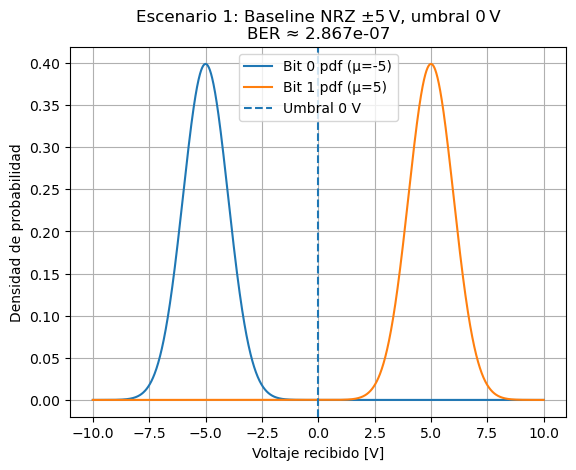

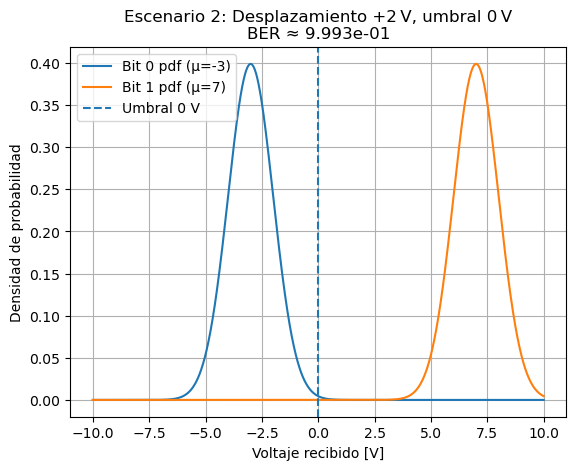

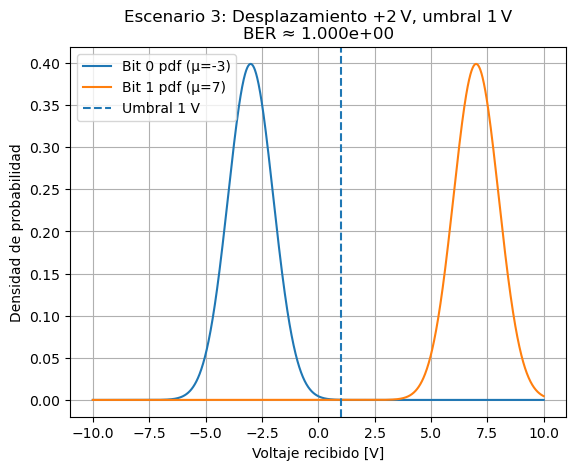

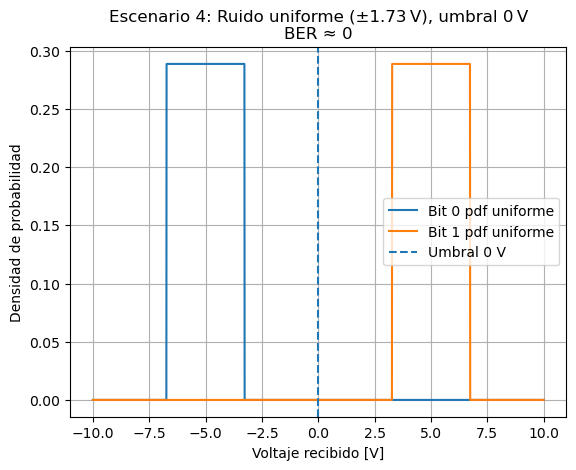

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Utility: Q-function using math.erfc
def Q(x):
    return 0.5 * math.erfc(x / math.sqrt(2))

sigma = 1  # standard deviation of Gaussian noise
x = np.linspace(-10, 10, 2000)

# ------- Scenario 1: Baseline (means ±5 V, threshold 0 V) -------
mu0, mu1 = -5, 5
threshold1 = 0
pdf0 = (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-(x-mu0)**2/(2*sigma**2))
pdf1 = (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-(x-mu1)**2/(2*sigma**2))

plt.figure()
plt.plot(x, pdf0, label="Bit 0 pdf (μ=-5)")
plt.plot(x, pdf1, label="Bit 1 pdf (μ=5)")
plt.axvline(threshold1, linestyle='--', label="Umbral 0 V")
ber1 = Q(5)  # same for both tails
plt.title(f"Escenario 1: Baseline NRZ ±5 V, umbral 0 V\nBER ≈ {ber1:.3e}")
plt.xlabel("Voltaje recibido [V]")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# ------- Scenario 2: Shift +2 V, threshold 0 V -------
mu0_a, mu1_a = -3, 7
threshold2 = 0
pdf0_a = (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-(x-mu0_a)**2/(2*sigma**2))
pdf1_a = (1/(sigma*math.sqrt(2*math.pi))) * np.exp(-(x-mu1_a)**2/(2*sigma**2))

plt.figure()
plt.plot(x, pdf0_a, label="Bit 0 pdf (μ=-3)")
plt.plot(x, pdf1_a, label="Bit 1 pdf (μ=7)")
plt.axvline(threshold2, linestyle='--', label="Umbral 0 V")
ber2 = 0.5*(Q((0-mu1_a)/sigma) + Q((mu0_a-threshold2)/sigma))  # Q(7) + Q(3) /2
plt.title(f"Escenario 2: Desplazamiento +2 V, umbral 0 V\nBER ≈ {ber2:.3e}")
plt.xlabel("Voltaje recibido [V]")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# ------- Scenario 3: Shift +2 V, threshold 1 V -------
mu0_b, mu1_b = -3, 7
threshold3 = 1
pdf0_b = pdf0_a  # same as scenario 2 for bit0
pdf1_b = pdf1_a  # same as scenario 2 for bit1

plt.figure()
plt.plot(x, pdf0_b, label="Bit 0 pdf (μ=-3)")
plt.plot(x, pdf1_b, label="Bit 1 pdf (μ=7)")
plt.axvline(threshold3, linestyle='--', label="Umbral 1 V")
ber3 = 0.5*(Q((threshold3-mu1_b)/sigma) + Q((mu0_b-threshold3)/sigma))  # Q(6)+Q(4)/2
plt.title(f"Escenario 3: Desplazamiento +2 V, umbral 1 V\nBER ≈ {ber3:.3e}")
plt.xlabel("Voltaje recibido [V]")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()

# ------- Scenario 4: Uniform noise (same σ), threshold 0 V -------
A = math.sqrt(3) * sigma  # +/-1.732
# Uniform pdf for noise; shifted signals
pdf0_u = np.where((x >= mu0 - A) & (x <= mu0 + A), 1/(2*A), 0)
pdf1_u = np.where((x >= mu1 - A) & (x <= mu1 + A), 1/(2*A), 0)
threshold4 = 0

plt.figure()
plt.plot(x, pdf0_u, label="Bit 0 pdf uniforme")
plt.plot(x, pdf1_u, label="Bit 1 pdf uniforme")
plt.axvline(threshold4, linestyle='--', label="Umbral 0 V")
plt.title("Escenario 4: Ruido uniforme (±1.73 V), umbral 0 V\nBER ≈ 0")
plt.xlabel("Voltaje recibido [V]")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(True)
plt.show()
